# Centralized learning for ECG Arrhythmia detection

In [1]:
from pathlib import Path

import lightning as L
import matplotlib.pyplot as plt
import wandb
from dotenv import load_dotenv
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint, TQDMProgressBar
from lightning.pytorch.loggers import WandbLogger, TensorBoardLogger

from dataset_utils import Cinc2017DataModule
from model import DenseNet1dModule
import os

/home/g113056077/.pyenv/versions/ecg-fl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Config

In [2]:
load_dotenv()
wandb_mode = os.getenv("WANDB_MODE")

## Prepare the Dataset

In [3]:
dm = Cinc2017DataModule(batch_size=64)

## Create the Model

In [4]:
model = DenseNet1dModule(num_classes=dm.num_classes, memory_efficient=False, lr=1e-3)

## Create the Trainer

In [5]:
checkpoint_callback = ModelCheckpoint(
    monitor="valid_loss",
    verbose=True,
    mode="min",
    save_top_k=1,
    save_last=True,
)

early_stopping_callback = EarlyStopping(
    monitor="valid_loss", patience=8, verbose=True, mode="min"
)

progress_bar_callback = TQDMProgressBar(leave=True)

if wandb_mode == 'disabled':
    logger = TensorBoardLogger(save_dir=Path('tb_logs'), name='ecg-centralized')
else:
    logger = WandbLogger(project='ecg-centralized', save_dir=Path('wandb_logs'), log_model=True)
    logger.experiment.name = "ecg-centralized"

trainer = L.Trainer(
    max_epochs=50,
    callbacks=[checkpoint_callback, early_stopping_callback, progress_bar_callback],
    logger=logger,
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


## Train the Model

In [6]:
trainer.fit(model, datamodule=dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type                      | Params | Mode  | In sizes     | Out sizes
-----------------------------------------------------------------------------------------------
0 | model         | DenseNet1d                | 3.5 M  | train | [1, 1, 6000] | [1, 3]   
1 | loss_fn       | CrossEntropyLoss          | 0      | train | ?            | ?        
2 | train_metrics | MetricCollection          | 0      | train | ?            | ?        
3 | valid_metrics | MetricCollection          | 0      | train | ?            | ?        
4 | test_metrics  | MetricCollection          | 0      | train | ?            | ?        
5 | valid_cm      | MulticlassConfusionMatrix | 0      | train | ?            | ?        
6 | test_cm       | MulticlassConfusionMatrix | 0      | train | ?            | ?        
-----------------------------------------------------------------------------------------------
3.5 M     Trainable params
0         Non-trai

Training: |          | 0/? [00:00<?, ?it/s]                                
Epoch 0: 100%|██████████| 91/91 [00:13<00:00,  6.81it/s, v_num=2, lr=0.001, valid_loss=1.540, valid_acc=0.139, valid_f1=0.140, train_loss=1.090, train_acc=0.371, train_f1=0.369]

Epoch 0, global step 91: 'valid_loss' reached 1.54185 (best 1.54185), saving model to 'tb_logs/ecg-centralized/version_2/checkpoints/epoch=0-step=91.ckpt' as top 1



Valid Confusion Matrix:
tensor([[  0, 569, 193],
        [  0,  90,  24],
        [  0, 280,  82]], device='cuda:0')
Epoch 1: 100%|██████████| 91/91 [00:13<00:00,  6.81it/s, v_num=2, lr=0.001, valid_loss=0.961, valid_acc=0.631, valid_f1=0.409, train_loss=1.040, train_acc=0.438, train_f1=0.424]

Epoch 1, global step 182: 'valid_loss' reached 0.96107 (best 0.96107), saving model to 'tb_logs/ecg-centralized/version_2/checkpoints/epoch=1-step=182.ckpt' as top 1



Valid Confusion Matrix:
tensor([[706,  47,   9],
        [ 47,  66,   1],
        [220, 133,   9]], device='cuda:0')
Epoch 2: 100%|██████████| 91/91 [00:13<00:00,  6.80it/s, v_num=2, lr=0.001, valid_loss=0.721, valid_acc=0.674, valid_f1=0.535, train_loss=0.928, train_acc=0.532, train_f1=0.483]

Epoch 2, global step 273: 'valid_loss' reached 0.72112 (best 0.72112), saving model to 'tb_logs/ecg-centralized/version_2/checkpoints/epoch=2-step=273.ckpt' as top 1



Valid Confusion Matrix:
tensor([[679,  34,  49],
        [ 16,  90,   8],
        [180, 117,  65]], device='cuda:0')
Epoch 3: 100%|██████████| 91/91 [00:13<00:00,  6.73it/s, v_num=2, lr=0.001, valid_loss=0.692, valid_acc=0.694, valid_f1=0.582, train_loss=0.796, train_acc=0.631, train_f1=0.615]

Epoch 3, global step 364: 'valid_loss' reached 0.69183 (best 0.69183), saving model to 'tb_logs/ecg-centralized/version_2/checkpoints/epoch=3-step=364.ckpt' as top 1



Valid Confusion Matrix:
tensor([[661,  23,  78],
        [  9,  98,   7],
        [130, 132, 100]], device='cuda:0')
Epoch 4: 100%|██████████| 91/91 [00:13<00:00,  6.80it/s, v_num=2, lr=0.001, valid_loss=0.569, valid_acc=0.758, valid_f1=0.708, train_loss=0.716, train_acc=0.685, train_f1=0.672]

Epoch 4, global step 455: 'valid_loss' reached 0.56939 (best 0.56939), saving model to 'tb_logs/ecg-centralized/version_2/checkpoints/epoch=4-step=455.ckpt' as top 1



Valid Confusion Matrix:
tensor([[663,  11,  88],
        [  3,  93,  18],
        [136,  43, 183]], device='cuda:0')
Epoch 5: 100%|██████████| 91/91 [00:13<00:00,  6.78it/s, v_num=2, lr=0.001, valid_loss=0.679, valid_acc=0.751, valid_f1=0.684, train_loss=0.658, train_acc=0.715, train_f1=0.708]

Epoch 5, global step 546: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[641,  37,  84],
        [  2, 100,  12],
        [100,  73, 189]], device='cuda:0')
Epoch 6: 100%|██████████| 91/91 [00:13<00:00,  6.77it/s, v_num=2, lr=0.001, valid_loss=0.548, valid_acc=0.768, valid_f1=0.697, train_loss=0.628, train_acc=0.739, train_f1=0.734]

Epoch 6, global step 637: 'valid_loss' reached 0.54764 (best 0.54764), saving model to 'tb_logs/ecg-centralized/version_2/checkpoints/epoch=6-step=637.ckpt' as top 1



Valid Confusion Matrix:
tensor([[687,  28,  47],
        [  2, 103,   9],
        [138,  63, 161]], device='cuda:0')
Epoch 7: 100%|██████████| 91/91 [00:13<00:00,  6.79it/s, v_num=2, lr=0.001, valid_loss=0.565, valid_acc=0.763, valid_f1=0.711, train_loss=0.585, train_acc=0.764, train_f1=0.761]

Epoch 7, global step 728: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[608,  28, 126],
        [  2,  86,  26],
        [ 66,  45, 251]], device='cuda:0')
Epoch 8: 100%|██████████| 91/91 [00:13<00:00,  6.77it/s, v_num=2, lr=0.001, valid_loss=0.470, valid_acc=0.825, valid_f1=0.785, train_loss=0.563, train_acc=0.769, train_f1=0.767]

Epoch 8, global step 819: 'valid_loss' reached 0.47013 (best 0.47013), saving model to 'tb_logs/ecg-centralized/version_2/checkpoints/epoch=8-step=819.ckpt' as top 1



Valid Confusion Matrix:
tensor([[687,  12,  63],
        [  4,  99,  11],
        [ 93,  34, 235]], device='cuda:0')
Epoch 9: 100%|██████████| 91/91 [00:13<00:00,  6.78it/s, v_num=2, lr=0.001, valid_loss=0.588, valid_acc=0.778, valid_f1=0.760, train_loss=0.515, train_acc=0.787, train_f1=0.782]

Epoch 9, global step 910: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[590,  13, 159],
        [  0, 101,  13],
        [ 54,  36, 272]], device='cuda:0')
Epoch 10: 100%|██████████| 91/91 [00:13<00:00,  6.77it/s, v_num=2, lr=0.001, valid_loss=0.509, valid_acc=0.825, valid_f1=0.782, train_loss=0.507, train_acc=0.795, train_f1=0.793]

Epoch 10, global step 1001: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[725,   6,  31],
        [  2,  97,  15],
        [137,  26, 199]], device='cuda:0')
Epoch 11: 100%|██████████| 91/91 [00:13<00:00,  6.76it/s, v_num=2, lr=0.001, valid_loss=0.494, valid_acc=0.799, valid_f1=0.754, train_loss=0.517, train_acc=0.788, train_f1=0.783]

Epoch 11, global step 1092: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[672,  14,  76],
        [  1, 104,   9],
        [101,  48, 213]], device='cuda:0')
Epoch 12: 100%|██████████| 91/91 [00:13<00:00,  6.76it/s, v_num=2, lr=0.001, valid_loss=0.491, valid_acc=0.806, valid_f1=0.773, train_loss=0.474, train_acc=0.811, train_f1=0.810]

Epoch 12, global step 1183: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[630,  21, 111],
        [  1, 105,   8],
        [ 56,  43, 263]], device='cuda:0')
Epoch 13: 100%|██████████| 91/91 [00:13<00:00,  6.75it/s, v_num=2, lr=0.001, valid_loss=0.472, valid_acc=0.834, valid_f1=0.794, train_loss=0.497, train_acc=0.800, train_f1=0.797]

Epoch 13, global step 1274: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[681,  19,  62],
        [  0, 101,  13],
        [ 80,  32, 250]], device='cuda:0')
Epoch 14: 100%|██████████| 91/91 [00:13<00:00,  6.66it/s, v_num=2, lr=0.001, valid_loss=0.491, valid_acc=0.798, valid_f1=0.768, train_loss=0.465, train_acc=0.816, train_f1=0.812]

Epoch 14, global step 1365: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[618,  13, 131],
        [  1,  97,  16],
        [ 52,  37, 273]], device='cuda:0')
Epoch 15: 100%|██████████| 91/91 [00:13<00:00,  6.73it/s, v_num=2, lr=0.001, valid_loss=0.422, valid_acc=0.838, valid_f1=0.817, train_loss=0.438, train_acc=0.834, train_f1=0.831]

Epoch 15, global step 1456: 'valid_loss' reached 0.42241 (best 0.42241), saving model to 'tb_logs/ecg-centralized/version_2/checkpoints/epoch=15-step=1456.ckpt' as top 1



Valid Confusion Matrix:
tensor([[683,   8,  71],
        [  2,  99,  13],
        [ 89,  17, 256]], device='cuda:0')
Epoch 16: 100%|██████████| 91/91 [00:13<00:00,  6.73it/s, v_num=2, lr=0.001, valid_loss=0.454, valid_acc=0.823, valid_f1=0.779, train_loss=0.417, train_acc=0.835, train_f1=0.833]

Epoch 16, global step 1547: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[682,  14,  66],
        [  3,  92,  19],
        [ 88,  29, 245]], device='cuda:0')
Epoch 17: 100%|██████████| 91/91 [00:13<00:00,  6.74it/s, v_num=2, lr=0.001, valid_loss=0.416, valid_acc=0.844, valid_f1=0.813, train_loss=0.430, train_acc=0.830, train_f1=0.829]

Epoch 17, global step 1638: 'valid_loss' reached 0.41600 (best 0.41600), saving model to 'tb_logs/ecg-centralized/version_2/checkpoints/epoch=17-step=1638.ckpt' as top 1



Valid Confusion Matrix:
tensor([[691,  12,  59],
        [  2, 109,   3],
        [ 82,  35, 245]], device='cuda:0')
Epoch 18: 100%|██████████| 91/91 [00:13<00:00,  6.75it/s, v_num=2, lr=0.001, valid_loss=0.472, valid_acc=0.813, valid_f1=0.774, train_loss=0.402, train_acc=0.848, train_f1=0.846]

Epoch 18, global step 1729: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[640,  21, 101],
        [  1, 109,   4],
        [ 49,  55, 258]], device='cuda:0')
Epoch 19: 100%|██████████| 91/91 [00:13<00:00,  6.74it/s, v_num=2, lr=0.001, valid_loss=0.413, valid_acc=0.840, valid_f1=0.800, train_loss=0.401, train_acc=0.845, train_f1=0.840]

Epoch 19, global step 1820: 'valid_loss' reached 0.41323 (best 0.41323), saving model to 'tb_logs/ecg-centralized/version_2/checkpoints/epoch=19-step=1820.ckpt' as top 1



Valid Confusion Matrix:
tensor([[719,   5,  38],
        [  1,  96,  17],
        [111,  26, 225]], device='cuda:0')
Epoch 20: 100%|██████████| 91/91 [00:13<00:00,  6.73it/s, v_num=2, lr=0.001, valid_loss=0.401, valid_acc=0.851, valid_f1=0.820, train_loss=0.415, train_acc=0.842, train_f1=0.839]

Epoch 20, global step 1911: 'valid_loss' reached 0.40087 (best 0.40087), saving model to 'tb_logs/ecg-centralized/version_2/checkpoints/epoch=20-step=1911.ckpt' as top 1



Valid Confusion Matrix:
tensor([[689,  13,  60],
        [  0, 101,  13],
        [ 76,  23, 263]], device='cuda:0')
Epoch 21: 100%|██████████| 91/91 [00:13<00:00,  6.72it/s, v_num=2, lr=0.001, valid_loss=0.434, valid_acc=0.826, valid_f1=0.790, train_loss=0.378, train_acc=0.852, train_f1=0.851]

Epoch 21, global step 2002: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[677,  10,  75],
        [  1,  88,  25],
        [ 86,  18, 258]], device='cuda:0')
Epoch 22: 100%|██████████| 91/91 [00:13<00:00,  6.72it/s, v_num=2, lr=0.001, valid_loss=0.496, valid_acc=0.826, valid_f1=0.781, train_loss=0.392, train_acc=0.851, train_f1=0.850]

Epoch 22, global step 2093: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[676,  20,  66],
        [  1, 109,   4],
        [ 73,  52, 237]], device='cuda:0')
Epoch 23: 100%|██████████| 91/91 [00:13<00:00,  6.72it/s, v_num=2, lr=0.001, valid_loss=0.410, valid_acc=0.850, valid_f1=0.806, train_loss=0.370, train_acc=0.856, train_f1=0.854]

Epoch 23, global step 2184: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[726,   9,  27],
        [  0, 102,  12],
        [104,  34, 224]], device='cuda:0')
Epoch 24: 100%|██████████| 91/91 [00:13<00:00,  6.71it/s, v_num=2, lr=0.001, valid_loss=0.506, valid_acc=0.822, valid_f1=0.788, train_loss=0.355, train_acc=0.867, train_f1=0.864]

Epoch 24, global step 2275: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[653,  20,  89],
        [  0, 106,   8],
        [ 64,  39, 259]], device='cuda:0')
Epoch 25: 100%|██████████| 91/91 [00:13<00:00,  6.71it/s, v_num=2, lr=0.001, valid_loss=0.463, valid_acc=0.773, valid_f1=0.709, train_loss=0.380, train_acc=0.854, train_f1=0.853]

Epoch 25, global step 2366: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[625,  64,  73],
        [  4,  95,  15],
        [ 73,  52, 237]], device='cuda:0')
Epoch 26: 100%|██████████| 91/91 [00:13<00:00,  6.71it/s, v_num=2, lr=0.001, valid_loss=0.380, valid_acc=0.855, valid_f1=0.825, train_loss=0.426, train_acc=0.833, train_f1=0.832]

Epoch 26, global step 2457: 'valid_loss' reached 0.38034 (best 0.38034), saving model to 'tb_logs/ecg-centralized/version_2/checkpoints/epoch=26-step=2457.ckpt' as top 1



Valid Confusion Matrix:
tensor([[695,   9,  58],
        [  0, 103,  11],
        [ 73,  28, 261]], device='cuda:0')
Epoch 27: 100%|██████████| 91/91 [00:13<00:00,  6.70it/s, v_num=2, lr=0.001, valid_loss=0.401, valid_acc=0.853, valid_f1=0.827, train_loss=0.386, train_acc=0.848, train_f1=0.848]

Epoch 27, global step 2548: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[684,  11,  67],
        [  2, 100,  12],
        [ 70,  20, 272]], device='cuda:0')
Epoch 28: 100%|██████████| 91/91 [00:13<00:00,  6.71it/s, v_num=2, lr=0.001, valid_loss=0.375, valid_acc=0.855, valid_f1=0.817, train_loss=0.392, train_acc=0.843, train_f1=0.841]

Epoch 28, global step 2639: 'valid_loss' reached 0.37547 (best 0.37547), saving model to 'tb_logs/ecg-centralized/version_2/checkpoints/epoch=28-step=2639.ckpt' as top 1



Valid Confusion Matrix:
tensor([[691,  10,  61],
        [  3,  98,  13],
        [ 63,  30, 269]], device='cuda:0')
Epoch 29: 100%|██████████| 91/91 [00:13<00:00,  6.71it/s, v_num=2, lr=0.001, valid_loss=0.396, valid_acc=0.859, valid_f1=0.822, train_loss=0.360, train_acc=0.859, train_f1=0.857]

Epoch 29, global step 2730: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[711,  17,  34],
        [  1, 105,   8],
        [ 87,  28, 247]], device='cuda:0')
Epoch 30: 100%|██████████| 91/91 [00:13<00:00,  6.71it/s, v_num=2, lr=0.001, valid_loss=0.460, valid_acc=0.825, valid_f1=0.806, train_loss=0.359, train_acc=0.864, train_f1=0.862]

Epoch 30, global step 2821: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[628,  11, 123],
        [  0, 101,  13],
        [ 45,  25, 292]], device='cuda:0')
Epoch 31: 100%|██████████| 91/91 [00:13<00:00,  6.70it/s, v_num=2, lr=0.001, valid_loss=0.414, valid_acc=0.834, valid_f1=0.815, train_loss=0.355, train_acc=0.866, train_f1=0.866]

Epoch 31, global step 2912: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[640,  14, 108],
        [  0, 107,   7],
        [ 48,  28, 286]], device='cuda:0')
Epoch 32: 100%|██████████| 91/91 [00:13<00:00,  6.70it/s, v_num=2, lr=0.001, valid_loss=0.409, valid_acc=0.842, valid_f1=0.826, train_loss=0.335, train_acc=0.872, train_f1=0.871]

Epoch 32, global step 3003: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[652,   9, 101],
        [  1, 103,  10],
        [ 54,  21, 287]], device='cuda:0')
Epoch 33: 100%|██████████| 91/91 [00:13<00:00,  6.70it/s, v_num=2, lr=0.001, valid_loss=0.452, valid_acc=0.821, valid_f1=0.800, train_loss=0.336, train_acc=0.873, train_f1=0.871]

Epoch 33, global step 3094: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[653,   5, 104],
        [  3,  89,  22],
        [ 75,  13, 274]], device='cuda:0')
Epoch 34: 100%|██████████| 91/91 [00:13<00:00,  6.71it/s, v_num=2, lr=0.001, valid_loss=0.375, valid_acc=0.869, valid_f1=0.838, train_loss=0.343, train_acc=0.865, train_f1=0.865]

Epoch 34, global step 3185: 'valid_loss' reached 0.37500 (best 0.37500), saving model to 'tb_logs/ecg-centralized/version_2/checkpoints/epoch=34-step=3185.ckpt' as top 1



Valid Confusion Matrix:
tensor([[713,   6,  43],
        [  3, 103,   8],
        [ 75,  27, 260]], device='cuda:0')
Epoch 35: 100%|██████████| 91/91 [00:13<00:00,  6.71it/s, v_num=2, lr=0.001, valid_loss=0.406, valid_acc=0.843, valid_f1=0.808, train_loss=0.327, train_acc=0.878, train_f1=0.878]

Epoch 35, global step 3276: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[674,  10,  78],
        [  1,  91,  22],
        [ 62,  21, 279]], device='cuda:0')
Epoch 36: 100%|██████████| 91/91 [00:13<00:00,  6.64it/s, v_num=2, lr=0.001, valid_loss=0.435, valid_acc=0.845, valid_f1=0.809, train_loss=0.328, train_acc=0.878, train_f1=0.877]

Epoch 36, global step 3367: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[667,  18,  77],
        [  1, 103,  10],
        [ 52,  34, 276]], device='cuda:0')
Epoch 37: 100%|██████████| 91/91 [00:13<00:00,  6.70it/s, v_num=2, lr=0.001, valid_loss=0.446, valid_acc=0.822, valid_f1=0.809, train_loss=0.332, train_acc=0.875, train_f1=0.873]

Epoch 37, global step 3458: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[616,   9, 137],
        [  0, 101,  13],
        [ 38,  23, 301]], device='cuda:0')
Epoch 38: 100%|██████████| 91/91 [00:13<00:00,  6.72it/s, v_num=2, lr=0.001, valid_loss=0.371, valid_acc=0.864, valid_f1=0.834, train_loss=0.313, train_acc=0.882, train_f1=0.882]

Epoch 38, global step 3549: 'valid_loss' reached 0.37111 (best 0.37111), saving model to 'tb_logs/ecg-centralized/version_2/checkpoints/epoch=38-step=3549.ckpt' as top 1



Valid Confusion Matrix:
tensor([[698,   9,  55],
        [  2,  96,  16],
        [ 68,  18, 276]], device='cuda:0')
Epoch 39: 100%|██████████| 91/91 [00:13<00:00,  6.72it/s, v_num=2, lr=0.001, valid_loss=0.385, valid_acc=0.858, valid_f1=0.830, train_loss=0.306, train_acc=0.894, train_f1=0.892]

Epoch 39, global step 3640: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[698,   7,  57],
        [  1, 105,   8],
        [ 75,  28, 259]], device='cuda:0')
Epoch 40: 100%|██████████| 91/91 [00:13<00:00,  6.70it/s, v_num=2, lr=0.0001, valid_loss=0.388, valid_acc=0.856, valid_f1=0.827, train_loss=0.279, train_acc=0.901, train_f1=0.900]

Epoch 40, global step 3731: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[685,   9,  68],
        [  1, 103,  10],
        [ 62,  28, 272]], device='cuda:0')
Epoch 41: 100%|██████████| 91/91 [00:13<00:00,  6.68it/s, v_num=2, lr=0.0001, valid_loss=0.381, valid_acc=0.863, valid_f1=0.838, train_loss=0.267, train_acc=0.897, train_f1=0.897]

Epoch 41, global step 3822: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[689,   6,  67],
        [  1, 102,  11],
        [ 60,  24, 278]], device='cuda:0')
Epoch 42: 100%|██████████| 91/91 [00:13<00:00,  6.68it/s, v_num=2, lr=0.0001, valid_loss=0.386, valid_acc=0.866, valid_f1=0.843, train_loss=0.250, train_acc=0.910, train_f1=0.908]

Epoch 42, global step 3913: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[688,   6,  68],
        [  1, 101,  12],
        [ 59,  20, 283]], device='cuda:0')
Epoch 43: 100%|██████████| 91/91 [00:13<00:00,  6.69it/s, v_num=2, lr=0.0001, valid_loss=0.380, valid_acc=0.859, valid_f1=0.831, train_loss=0.264, train_acc=0.900, train_f1=0.899]

Epoch 43, global step 4004: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[685,   6,  71],
        [  1, 101,  12],
        [ 59,  26, 277]], device='cuda:0')
Epoch 44: 100%|██████████| 91/91 [00:13<00:00,  6.71it/s, v_num=2, lr=0.0001, valid_loss=0.381, valid_acc=0.861, valid_f1=0.834, train_loss=0.247, train_acc=0.910, train_f1=0.910]

Epoch 44, global step 4095: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[693,   5,  64],
        [  1, 102,  11],
        [ 65,  26, 271]], device='cuda:0')
Epoch 45: 100%|██████████| 91/91 [00:13<00:00,  6.69it/s, v_num=2, lr=0.0001, valid_loss=0.374, valid_acc=0.862, valid_f1=0.836, train_loss=0.247, train_acc=0.909, train_f1=0.910]

Epoch 45, global step 4186: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[683,   5,  74],
        [  1, 101,  12],
        [ 54,  25, 283]], device='cuda:0')
Epoch 46: 100%|██████████| 91/91 [00:13<00:00,  6.71it/s, v_num=2, lr=0.0001, valid_loss=0.378, valid_acc=0.862, valid_f1=0.838, train_loss=0.247, train_acc=0.910, train_f1=0.910]

Epoch 46, global step 4277: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[678,   5,  79],
        [  2, 100,  12],
        [ 50,  23, 289]], device='cuda:0')
Epoch 47: 100%|██████████| 91/91 [00:13<00:00,  6.71it/s, v_num=2, lr=0.0001, valid_loss=0.371, valid_acc=0.873, valid_f1=0.846, train_loss=0.242, train_acc=0.908, train_f1=0.909]

Epoch 47, global step 4368: 'valid_loss' reached 0.37079 (best 0.37079), saving model to 'tb_logs/ecg-centralized/version_2/checkpoints/epoch=47-step=4368.ckpt' as top 1



Valid Confusion Matrix:
tensor([[703,   5,  54],
        [  2, 100,  12],
        [ 62,  22, 278]], device='cuda:0')
Epoch 48: 100%|██████████| 91/91 [00:13<00:00,  6.65it/s, v_num=2, lr=0.0001, valid_loss=0.387, valid_acc=0.863, valid_f1=0.834, train_loss=0.234, train_acc=0.915, train_f1=0.914]

Epoch 48, global step 4459: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[694,   7,  61],
        [  1, 102,  11],
        [ 64,  26, 272]], device='cuda:0')
Epoch 49: 100%|██████████| 91/91 [00:13<00:00,  6.69it/s, v_num=2, lr=0.0001, valid_loss=0.382, valid_acc=0.864, valid_f1=0.842, train_loss=0.242, train_acc=0.912, train_f1=0.911]

Epoch 49, global step 4550: 'valid_loss' was not in top 1



Valid Confusion Matrix:
tensor([[686,   4,  72],
        [  2, 103,   9],
        [ 57,  24, 281]], device='cuda:0')


`Trainer.fit` stopped: `max_epochs=50` reached.


## Evaluate the Model on the Test Set

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 20/20 [00:00<00:00, 25.85it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8513731956481934     │
│          test_f1          │    0.8263387680053711     │
│         test_loss         │    0.41612064838409424    │
└───────────────────────────┴───────────────────────────┘

              precision    recall  f1-score   support

           N       0.91      0.89      0.90       762
           A       0.76      0.88      0.82       114
           O       0.76      0.76      0.76       362

    accuracy                           0.85      1238
   macro avg       0.81      0.84      0.83      1238
weighted avg       0.85      0.85      0.85      1238



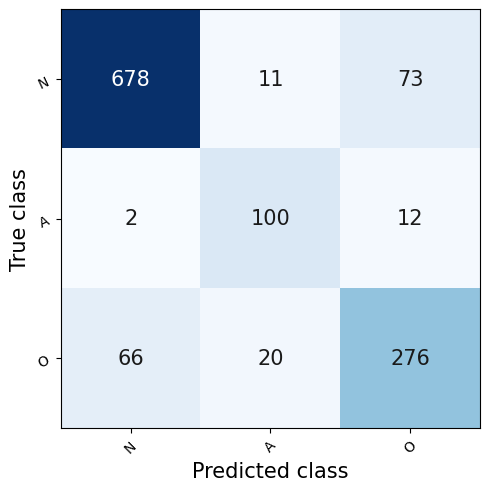

In [7]:
from sklearn.metrics import classification_report

model = DenseNet1dModule.load_from_checkpoint(checkpoint_callback.last_model_path)
_ = trainer.test(model, dataloaders=dm)

# classification report
print(classification_report(model.test_y_true_log, model.test_y_hat_log, target_names=dm.test_set.classes))

# confusion matrix
fig, ax = model.test_cm.plot(
    model.test_cm_log, cmap="Blues", labels=dm.test_set.classes
)
plt.show()

if wandb_mode != 'disabled':
    wandb.log({"test_cm": fig})
    

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 20/20 [00:00<00:00, 26.03it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8642972707748413     │
│          test_f1          │    0.8344470262527466     │
│         test_loss         │    0.4165220558643341     │
└───────────────────────────┴───────────────────────────┘

              precision    recall  f1-score   support

           N       0.91      0.92      0.91       762
           A       0.78      0.85      0.82       114
           O       0.80      0.75      0.78       362

    accuracy                           0.86      1238
   macro avg       0.83      0.84      0.83      1238
weighted avg       0.86      0.86      0.86      1238



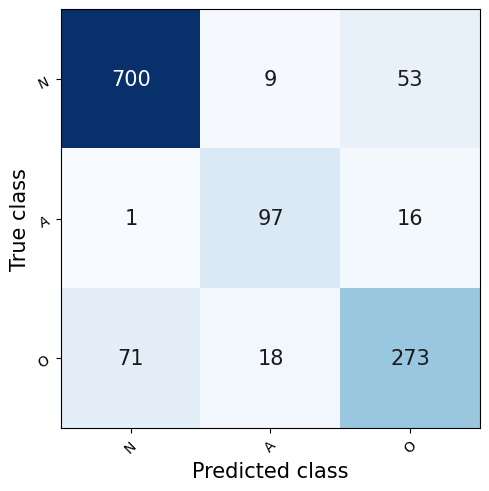

In [8]:
model = DenseNet1dModule.load_from_checkpoint(checkpoint_callback.best_model_path)
_ = trainer.test(model, dataloaders=dm)

# classification report
print(classification_report(model.test_y_true_log, model.test_y_hat_log, target_names=dm.test_set.classes))

# confusion matrix
fig, ax = model.test_cm.plot(
    model.test_cm_log, cmap="Blues", labels=dm.test_set.classes
)
plt.show()

if wandb_mode != 'disabled':
    wandb.log({"test_cm": fig})

In [9]:
wandb.finish()